In [ ]:
import kagglehub
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from pathlib import Path

C:\Users\Guilherme\AppData\Roaming\Python\Python313\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
C:\Users\Guilherme\AppData\Roaming\Python\Python313\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/tensor.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
C:\Users\Guilherme\AppData\Roaming\Python\Python313\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/resource_handle.pr

Carregar dataset

In [4]:
path = kagglehub.dataset_download("kshitij192/cars-image-dataset") 
root = Path(path).parent
imagens = root / "3" / "Cars Dataset" #configura o caminho do dataset de imagens para que a variavel imagens aponte para ele

100%|██████████| 36.3M/36.3M [00:03<00:00, 9.54MB/s]

Extracting files...


dataset escolhido já vinha pré-divido em treino e teste

In [5]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory( #define o dataset de treino
    directory=imagens / "train",
    seed=123,
    image_size=(180, 180),  
    batch_size=32
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory( #define o dataset de teste
    directory=imagens / "test",
    seed=123,
    image_size=(180, 180),
    batch_size=32
)

Found 3352 files belonging to 7 classes.
Found 813 files belonging to 7 classes.


In [6]:
class_names = train_ds.class_names
print(class_names)
num_classes = len(class_names)

['Audi', 'Hyundai Creta', 'Mahindra Scorpio', 'Rolls Royce', 'Swift', 'Tata Safari', 'Toyota Innova']


In [7]:
AUTOTUNE = tf.data.AUTOTUNE #para melhorar a performance do carregamento dos dados
train=train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
test=test_ds.cache().prefetch(buffer_size=AUTOTUNE) 

Modelo 1 (CNN sequencial)

In [8]:
model = models.Sequential([
    layers.Input(shape=(180, 180, 3)), #camada de entrada
    layers.Rescaling(1./255), #normalização dos dados
    layers.Conv2D(32, (3, 3), activation='relu'), #camada convolucional com 32 filtros (oculta)
    layers.MaxPooling2D(),
    layers.Conv2D(64, (3, 3), activation='relu'), #camada convolucional com 64 filtros (oculta)
    layers.MaxPooling2D(),
    layers.Conv2D(128, (3, 3), activation='relu'), #camada convolucional com 128 filtros (oculta))
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(100, activation='relu'), #100 neurônios na camada densa (oculta)
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax') #camada de saída com ativação softmax
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [9]:
history = model.fit(
    train_ds,
    validation_data=test_ds,
    epochs=10  #iterações
) 

Epoch 1/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 96s 890ms/step - accuracy: 0.2563 - loss: 1.8950 - val_accuracy: 0.3506 - val_loss: 1.7543
Epoch 2/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 81s 771ms/step - accuracy: 0.3911 - loss: 1.6543 - val_accuracy: 0.4637 - val_loss: 1.4727
Epoch 3/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 80s 761ms/step - accuracy: 0.4943 - loss: 1.4001 - val_accuracy: 0.5683 - val_loss: 1.2495
Epoch 4/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 77s 735ms/step - accuracy: 0.5764 - loss: 1.1958 - val_accuracy: 0.5720 - val_loss: 1.1870
Epoch 5/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 74s 705ms/step - accuracy: 0.6468 - loss: 0.9801 - val_accuracy: 0.6371 - val_loss: 1.0390
Epoch 6/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 83s 792ms/step - accuracy: 0.7175 - loss: 0.7735 - val_accuracy: 0.6482 - val_loss: 1.0233
Epoch 7/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 75s 713ms/step - accuracy: 0.7748 - loss: 0.6367 - val_accuracy: 0.6581 - val_loss: 1.0512
Epoch 8/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 73s 694ms/step - accuracy: 0.8126 - loss: 0

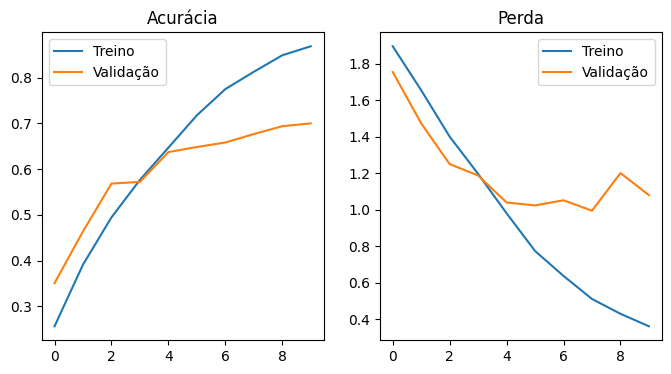

In [10]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Treino')
plt.plot(val_acc, label='Validação')
plt.title('Acurácia')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(loss, label='Treino')
plt.plot(val_loss, label='Validação')
plt.title('Perda')
plt.legend()
plt.show()


# Modelo 2

| Aspecto  | Versão 1 | Versão 2  |
| ---| --- | --- |
| Função de ativação | relu  | tanh |
| Filtros CNN | 32  64  128 | 64  128  256 |
| Camadas densas | 100 | 256 + 128  |
| Dropout | 0.5 | 0.5 + 0.3 |
| Epoch  | 10 | 15  |
| Profundidade da rede | menor  | maior  |

In [11]:
model2 = models.Sequential([
    layers.Input(shape=(180, 180, 3)),
    layers.Rescaling(1./255),

    # Aumenta o número de filtros e adicion mais uma camada convolucional
    layers.Conv2D(64, (3, 3), activation='tanh'),
    layers.MaxPooling2D(),

    layers.Conv2D(128, (3, 3), activation='tanh'),
    layers.MaxPooling2D(),

    layers.Conv2D(256, (3, 3), activation='tanh'),
    layers.MaxPooling2D(),

    # Camadas densas maiores
    layers.Flatten(),
    layers.Dense(256, activation='tanh'),  # antes era 100
    layers.Dropout(0.5),
    layers.Dense(128, activation='tanh'),  # camada extra
    layers.Dropout(0.3),

    layers.Dense(num_classes, activation='softmax')
])

model2.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [13]:
history2 = model2.fit(
    train_ds,
    validation_data=test_ds,
    epochs=15,  # antes era 10
)

Epoch 1/15
105/105 ━━━━━━━━━━━━━━━━━━━━ 321s 3s/step - accuracy: 0.1808 - loss: 2.2755 - val_accuracy: 0.2448 - val_loss: 1.9025
Epoch 2/15
105/105 ━━━━━━━━━━━━━━━━━━━━ 305s 3s/step - accuracy: 0.1960 - loss: 2.1158 - val_accuracy: 0.2448 - val_loss: 1.8580
Epoch 3/15
105/105 ━━━━━━━━━━━━━━━━━━━━ 298s 3s/step - accuracy: 0.2079 - loss: 2.0597 - val_accuracy: 0.2337 - val_loss: 1.8618
Epoch 4/15
105/105 ━━━━━━━━━━━━━━━━━━━━ 302s 3s/step - accuracy: 0.2139 - loss: 2.0262 - val_accuracy: 0.2448 - val_loss: 1.8894
Epoch 5/15
105/105 ━━━━━━━━━━━━━━━━━━━━ 311s 3s/step - accuracy: 0.2044 - loss: 2.0104 - val_accuracy: 0.2337 - val_loss: 1.8641
Epoch 6/15
105/105 ━━━━━━━━━━━━━━━━━━━━ 308s 3s/step - accuracy: 0.2115 - loss: 1.9902 - val_accuracy: 0.2460 - val_loss: 1.8651
Epoch 7/15
105/105 ━━━━━━━━━━━━━━━━━━━━ 340s 3s/step - accuracy: 0.2008 - loss: 1.9692 - val_accuracy: 0.2435 - val_loss: 1.8611
Epoch 8/15
105/105 ━━━━━━━━━━━━━━━━━━━━ 296s 3s/step - accuracy: 0.2202 - loss: 1.9369 - val_accu

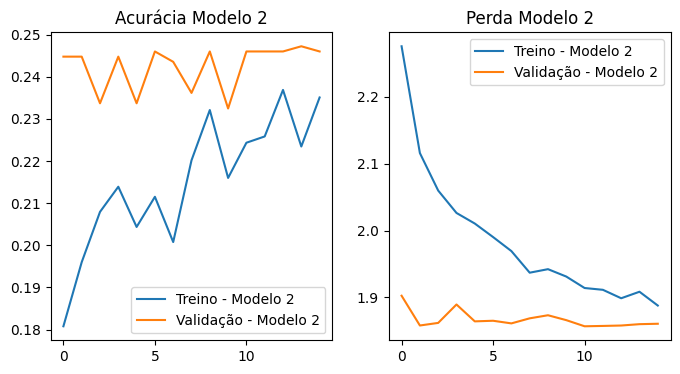

In [14]:
acc2 = history2.history['accuracy']
val_acc2 = history2.history['val_accuracy']
loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(acc2, label='Treino - Modelo 2')
plt.plot(val_acc2, label='Validação - Modelo 2')
plt.title('Acurácia Modelo 2')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(loss2, label='Treino - Modelo 2')
plt.plot(val_loss2, label='Validação - Modelo 2')
plt.title('Perda Modelo 2')
plt.legend()
plt.show()
